Step 1: Loading the Data
Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the dataset into a DataFrame:

In [3]:
# Load the dataset 
df = pd.read_csv('C:/Users/arshad/Downloads/flipkart_reviews.csv')

# Display the first few rows to understand its structure
print(df.head())


                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


Step 2: Data Exploration and Preprocessing
Check for Null Values

In [91]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)


Product_name      0
Review            0
Rating            0
Cleaned_Review    0
dtype: int64


Understand Dataset

In [93]:
# Check the shape of the dataset (number of rows and columns)
print(df.shape)

# View column names
print(df.columns)


(2304, 4)
Index(['Product_name', 'Review', 'Rating', 'Cleaned_Review'], dtype='object')


Check Data Types

In [6]:
# Check the data types of each column
print(df.dtypes)


Product_name    object
Review          object
Rating           int64
dtype: object


Explore Sentiment Distribution

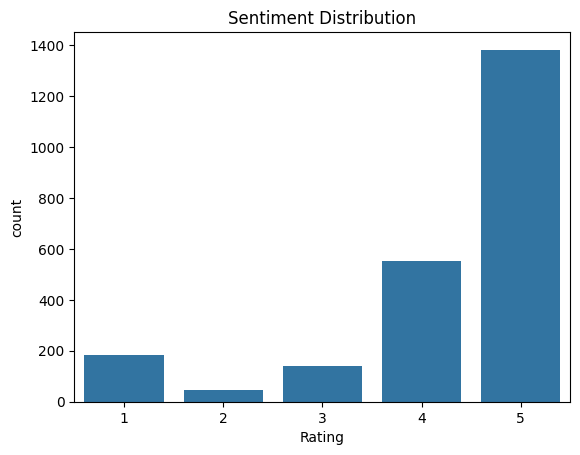

In [94]:
# Visualize the distribution of sentiment labels
sns.countplot(x='Rating', data=df)
plt.title('Sentiment Distribution')
plt.show()


Step 3: Text Preprocessing
Clean the text data:

In [65]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from textblob import TextBlob
import re

In [66]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arshad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arshad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arshad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arshad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [95]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [96]:
import emoji
import re

# Negation handling function
def handle_negations(text):
    negation_words = ["not", "don't", "isn't", "aren't", "wasn't", "weren't", "no", "never", "nothing", "none"]
    
    # Regular expression for negation
    negation_pattern = r"\b(?:{})\b".format("|".join(negation_words))
    
    # Split text into words and handle negations
    words = text.split()
    negated = False
    updated_text = []
    
    for word in words:
        # If a negation word is encountered, toggle the negated flag
        if re.match(negation_pattern, word):
            negated = True
        elif negated:
            # Add 'NOT_' to the next word after a negation word
            updated_text.append("NOT_" + word)
            negated = False  # Reset the flag
        else:
            updated_text.append(word)
    
    return ' '.join(updated_text)



# Spelling correction function
def correct_spelling(text):
    blob = TextBlob(text)
    corrected_text = blob.correct()  # Correct the spelling
    return str(corrected_text)

# Text cleaning function with spelling correction and negation handling
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)


    
# Apply the cleaning function to the 'Review' column
df['Cleaned_Review'] = df['Review'].apply(clean_text)


In [97]:
import pandas as pd

# Set pandas display options to show the full content of the 'Cleaned_Review' column
pd.set_option('display.max_colwidth', None)

# Display the DataFrame with the full content of the 'Review' and 'Cleaned_Review' columns
df[['Review', 'Cleaned_Review']].head()



,Review,Cleaned_Review
0,Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,best 60k great performancei got around 58500battery backup bit low thanks rapid charger fast display ok price range decent speaker many customisation optionsvantage software good customisationoverall good performance till nowwill update later problem occurs
1,Good perfomence...,good perfomence
2,"Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",great performance usually also gaming laptop issue battery stand 2 3 hr without adapter prefer use adaptor using software playing game
3,My wife is so happy and best product 👌🏻😘,wife happy best product
4,"Light weight laptop with new amazing features, battery life is awesome.",light weight laptop new amazing feature battery life awesome


In [98]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_data.csv', index=False)



Step 4: Feature Engineering
Convert text data into numerical form using Bag-of-Words:

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Convert the cleaned text into a numerical representation
X = vectorizer.fit_transform(df['Cleaned_Review'])

# If you want to check the shape of the feature matrix
print(X.shape)


(2304, 5002)


Step 5: Splitting Data
Separate data into features (X) and target (y):

In [100]:
# Assuming 'Rating' is the target variable
y = df['Rating']
X = vectorizer.transform(df['Cleaned_Review'])  # Transforming the reviews into feature vectors

# Split the data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
# View the first few labels of the training set
print(y_train.head())

# View the first few labels of the test set
print(y_test.head())


650     5
2198    5
1314    4
360     1
974     2
Name: Rating, dtype: int64
1640    5
508     5
1422    4
44      5
1398    1
Name: Rating, dtype: int64


Step 6: Model Building
Choose a classification algorithm and train the model:

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Step 7: Model Evaluation
Predict sentiments on the test dataset:

In [103]:
# Predict the sentiments for the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, and F1 Score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)


Step 8: Conclusion and Visualization
Summarize the results and visualize key metrics:

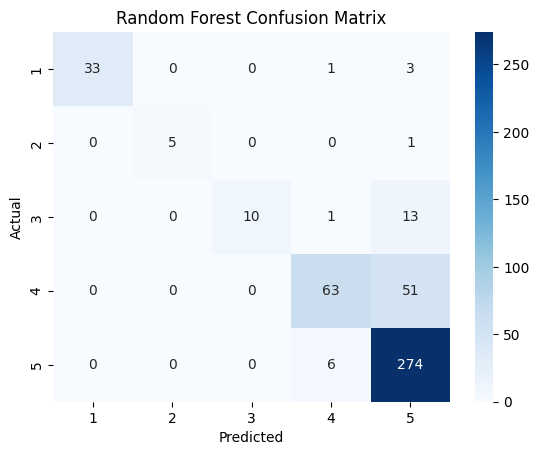

In [104]:
# Visualizing the Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [105]:
# Display the results for Random Forest
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Random Forest Model Precision: {precision_rf:.2f}")
print(f"Random Forest Model Recall: {recall_rf:.2f}")
print(f"Random Forest Model F1 Score: {f1_rf:.2f}")


Random Forest Model Accuracy: 83.51%
Random Forest Model Precision: 0.85
Random Forest Model Recall: 0.84
Random Forest Model F1 Score: 0.82
